In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
year_lst = list(range(2009, 2020))

In [3]:
csv_lst = []
for num in year_lst:
    csv_lst.append('data/{}_Update.csv'.format(num))
csv_lst

['data/2009_Update.csv',
 'data/2010_Update.csv',
 'data/2011_Update.csv',
 'data/2012_Update.csv',
 'data/2013_Update.csv',
 'data/2014_Update.csv',
 'data/2015_Update.csv',
 'data/2016_Update.csv',
 'data/2017_Update.csv',
 'data/2018_Update.csv',
 'data/2019_Update.csv']

In [4]:
def split_playoff_tables(lst):
    no_playoff = []
    playoff = []
    for i in lst:
        df = pd.read_csv(i)
        filtered = df[['year', 'Team', 'Pts/G', 'Yds/G', 'Playoff']]
        playoff_tb = filtered.loc[lambda filtered: filtered['Playoff'] == True]
        no_playoff_tb = filtered.loc[lambda filtered: filtered['Playoff'] == False]
        playoff.append(playoff_tb)
        no_playoff.append(no_playoff_tb)
    return playoff, no_playoff

In [5]:
yearly_splits = split_playoff_tables(csv_lst)

In [66]:
yearly_splits[0][0]['Yds/G']    

1     284.4
2     300.5
3     301.4
4     305.3
8     315.9
9     319.7
11    321.1
13    324.9
15    327.0
19    346.4
24    357.8
26    365.6
Name: Yds/G, dtype: float64

In [7]:
yearly_splits[1][0]

,year,Team,Pts/G,Yds/G,Playoff
0,2009,New York JetsNY Jets,14.8,252.3,False
5,2009,Minnesota VikingsMinnesota,19.5,305.5,False
6,2009,Denver BroncosDenver,20.2,315.0,False
7,2009,Carolina PanthersCarolina,19.2,315.8,False
10,2009,New England PatriotsNew England,17.8,320.2,False
12,2009,Houston TexansHouston,20.8,324.9,False
14,2009,San Francisco 49ersSan Francisco,17.6,326.4,False
16,2009,Chicago BearsChicago,23.4,337.8,False
17,2009,Indianapolis ColtsIndianapolis,19.2,339.2,False
18,2009,Buffalo BillsBuffalo,20.4,340.6,False


In [8]:
Yes_playoffs_df = pd.concat(yearly_splits[0][:])

In [82]:
count = Yes_playoffs_df['Yds/G'].count() + No_playoffs_df['Yds/G'].count()

In [80]:
total_yds = Yes_playoffs_df['Yds/G'].sum() + No_playoffs_df['Yds/G'].sum()

In [75]:
total_avg_yds = total_yds/ count
print('The average "yrds against/ game" for all teams over 11 seasons is {:2.2f}'.format(total_avg_yds))

The average "yrds against/ game" for all teams over 11 seasons is 345.37


In [78]:
total_pts = Yes_playoffs_df['Pts/G'].sum() + No_playoffs_df['Pts/G'].sum()

In [77]:
total_avg_pts = total_pts/ count
print('The average "points against/ game" for all teams over 11 seasons is {:2.2f}'.format(total_avg_pts))

The average "points against/ game" for all teams over 11 seasons is 22.54


In [9]:
No_playoffs_df = pd.concat(yearly_splits[1][:])

In [10]:
No_playoffs_df

,year,Team,Pts/G,Yds/G,Playoff
0,2009,New York JetsNY Jets,14.8,252.3,False
5,2009,Minnesota VikingsMinnesota,19.5,305.5,False
6,2009,Denver BroncosDenver,20.2,315.0,False
7,2009,Carolina PanthersCarolina,19.2,315.8,False
10,2009,New England PatriotsNew England,17.8,320.2,False
...,...,...,...,...,...
26,2019,Washington RedskinsWashington,27.2,385.1,False
28,2019,Cincinnati BengalsCincinnati,26.2,393.7,False
29,2019,Miami DolphinsMiami,30.9,397.8,False
30,2019,Detroit LionsDetroit,26.4,400.4,False


In [11]:
yes_overall_df_yds = pd.DataFrame(Yes_playoffs_df['Yds/G'].describe())
yes_overall_df_pts = pd.DataFrame(Yes_playoffs_df['Pts/G'].describe())

In [63]:
overall_defense.head()

,Yds/G,Yds/G
count,132.000000,220.000000
mean,334.923485,351.632273
std,32.044430,28.466120
min,267.100000,252.300000
25%,307.875000,333.000000


In [12]:
yes_overall_df = pd.concat([yes_overall_df_yds, yes_overall_df_pts], axis=1,sort=False)

In [13]:
yes_overall_df = yes_overall_df.rename(columns={'Yds/G': 'Yds/G(Playoffs)', 'Pts/G':'Pts/G(Playoffs)'})
yes_overall_df = yes_overall_df.round(2)
yes_overall_df

,Yds/G(Playoffs),Pts/G(Playoffs)
count,132.00,132.00
mean,334.92,20.19
std,32.04,2.88
min,267.10,14.10
25%,307.88,18.35
50%,338.15,20.20
75%,359.15,21.92
max,411.60,26.80


In [14]:
no_overall_df_yds = pd.DataFrame(No_playoffs_df['Yds/G'].describe())
no_overall_df_pts = pd.DataFrame(No_playoffs_df['Pts/G'].describe())
no_overall_df = pd.concat([no_overall_df_yds, no_overall_df_pts], axis=1,sort=False)

In [15]:
no_overall_df = no_overall_df.rename(columns={'Yds/G': 'Yds/G(No Playoffs)', 'Pts/G':'Pts/G(No Playoffs)'})
no_overall_df = no_overall_df.round(2)
no_overall_df

,Yds/G(No Playoffs),Pts/G(No Playoffs)
count,220.00,220.00
mean,351.63,23.95
std,28.47,3.21
min,252.30,14.80
25%,333.00,21.58
50%,350.10,23.90
75%,373.05,26.52
max,440.10,30.90


In [16]:
total_generic = pd.concat([yes_overall_df, no_overall_df], axis=1,sort=False)

In [17]:
total_generic

,Yds/G(Playoffs),Pts/G(Playoffs),Yds/G(No Playoffs),Pts/G(No Playoffs)
count,132.00,132.00,220.00,220.00
mean,334.92,20.19,351.63,23.95
std,32.04,2.88,28.47,3.21
min,267.10,14.10,252.30,14.80
25%,307.88,18.35,333.00,21.58
50%,338.15,20.20,350.10,23.90
75%,359.15,21.92,373.05,26.52
max,411.60,26.80,440.10,30.90


In [18]:
Yds_G_df = total_generic[['Yds/G(No Playoffs)', 'Yds/G(Playoffs)']]
Pts_G_df = total_generic[['Pts/G(No Playoffs)', 'Pts/G(Playoffs)']]

In [19]:
Yds_G_df

,Yds/G(No Playoffs),Yds/G(Playoffs)
count,220.00,132.00
mean,351.63,334.92
std,28.47,32.04
min,252.30,267.10
25%,333.00,307.88
50%,350.10,338.15
75%,373.05,359.15
max,440.10,411.60


In [20]:
Pts_G_df

,Pts/G(No Playoffs),Pts/G(Playoffs)
count,220.00,132.00
mean,23.95,20.19
std,3.21,2.88
min,14.80,14.10
25%,21.58,18.35
50%,23.90,20.20
75%,26.52,21.92
max,30.90,26.80


In [21]:
data1_yrds = Yes_playoffs_df['Yds/G']
data2_yrds = No_playoffs_df['Yds/G']
data1_pnts = Yes_playoffs_df['Pts/G']
data2_pnts = No_playoffs_df['Pts/G']
mean1 = data1_yrds.mean()
mean2 = data2_yrds.mean()
num1 = data1_yrds.count()
num2 = data2_yrds.count()
std1 = np.std(data1_yrds)
std2 = np.std(data2_yrds)
mean1, mean2, num1, num2, std1, std2

(334.92348484848475,
 351.6322727272728,
 132,
 220,
 31.92281852219954,
 28.401350869251758)

In [22]:
def welch_test(data_1, data_2):
    numerator = np.mean(data_1) - np.mean(data_2)
    denominator_sq = (np.var(data_1) / len(data_2)) + (np.var(data_2) / len(data_2))
    return numerator / np.sqrt(denominator_sq)
test_statistic_yrds = welch_test(data1_yrds, data2_yrds)


print("Welch Test Statistic based on avg_yards allowed: {:2.2f}".format(test_statistic_yrds))

test_statistic_pnts = welch_test(data1_pnts, data2_pnts)
print("Welch Test Statistic based on avg_pnts allowed: {:2.2f}".format(test_statistic_pnts))

Welch Test Statistic based on avg_yards allowed: -5.80
Welch Test Statistic based on avg_pnts allowed: -12.93


In [23]:
ttest_ind(data1_yrds, data2_yrds, equal_var=False)

Ttest_indResult(statistic=-4.9352262646919955, pvalue=1.4605969165431278e-06)

Text(0.5, 1.0, "Distribution of 'AVG_YDS Against' Under the Null Hypothesis")

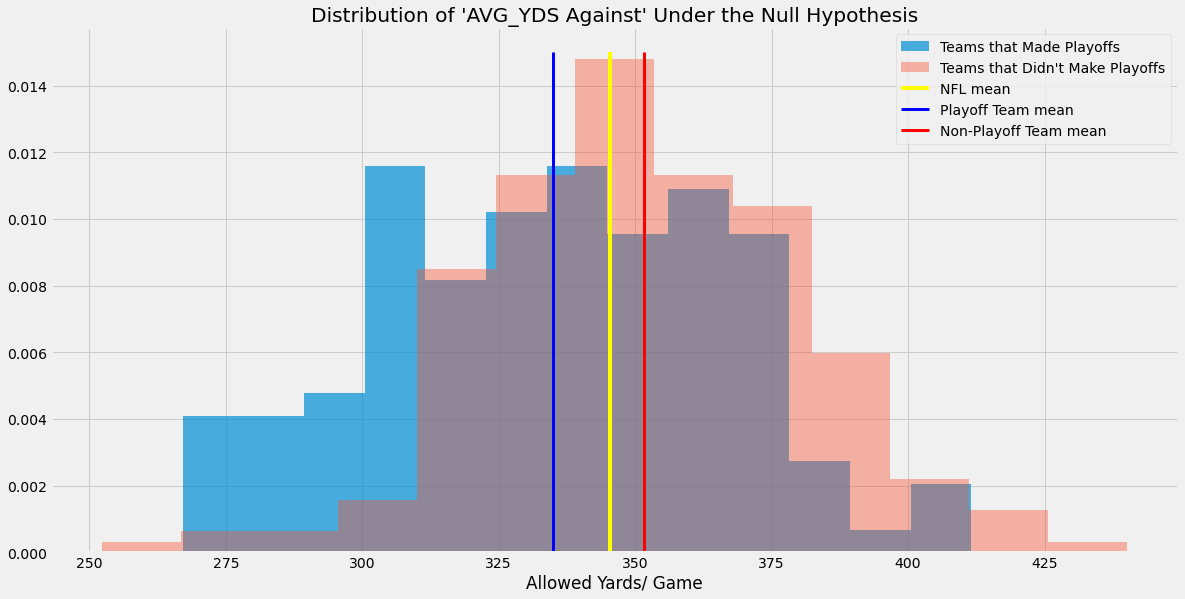

In [98]:
fig, ax = plt.subplots(1, figsize=(18, 9))

ax.vlines(x=total_avg_yds, ymin=0, ymax=.015, linewidth=4, linestyles='solid', label='NFL mean', color='yellow')
ax.vlines(x=mean1, ymin=0, ymax=.015, linewidth=3, linestyles='solid', label='Playoff Team mean', color='b')
ax.vlines(x=mean2, ymin=0, ymax=.015, linewidth=3, linestyles='solid', label='Non-Playoff Team mean', color='r')
ax.hist(data1_yrds,alpha=.7, density=True, bins=13, label="Teams that Made Playoffs")
ax.hist(data2_yrds, alpha=.4, density=True, bins=13, label="Teams that Didn't Make Playoffs")
ax.set_xlabel('Allowed Yards/ Game')
ax.legend()
ax.set_title("Distribution of 'AVG_YDS Against' Under the Null Hypothesis")

Text(0.5, 1.0, 'Yrds Allowed Comparison of the Describe Method STATS')

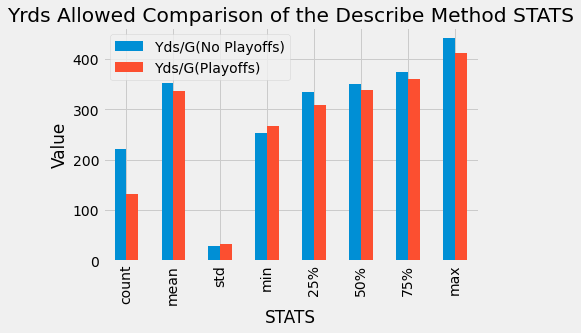

In [25]:
ax = Yds_G_df.plot(kind="bar")
ax.set_xlabel('STATS')
ax.set_ylabel('Value')
ax.set_title("Yrds Allowed Comparison of the Describe Method STATS")

Text(0.5, 1.0, 'Pts Allowed Comparison of the Describe Method STATS')

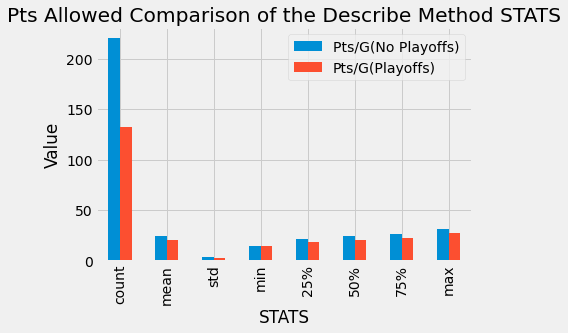

In [26]:
ax = Pts_G_df.plot(kind="bar")
ax.set_xlabel('STATS')
ax.set_ylabel('Value')
ax.set_title("Pts Allowed Comparison of the Describe Method STATS")